In [49]:
import sys
from os.path import join as pjoin
import os

In [2]:
paths = ['/home/contematto/github/PyMVPA/',
        '/data/famface/openfmri/scripts']

In [3]:
for p in paths:
    if p not in sys.path:
        sys.path.insert(1, p)

In [4]:
%matplotlib inline

In [5]:
from mvpa2.misc.plot.scatter import plot_scatter_files, plot_scatter, plot_scatter_matrix

In [6]:
from expdir import expdir

In [7]:
fns = expdir()

Loading a mask from Mike Arcaro's work: union of bilateral v1, v2, v3

In [8]:
ev_mask = '/data/famface/openfmri/ProbAtlas_v4/v1+v2+v3_mh.nii.gz'

In [9]:
# v1v mask
v1v_mask = '/data/famface/openfmri/ProbAtlas_v4/v1v_mh.nii.gz'

In [30]:
# intersection between v1v mask and significant voxels for familiar vs unfamiliar (id)
tfce_v1v_mask = '/data/famface/openfmri/ProbAtlas_v4/v1v_mh+famvsunfam-id-tfce.nii.gz'

In [54]:
outdir = 'img_scatter'
try:
    os.makedirs(outdir)
except OSError:
    pass

def savefig(f, name):
    f.savefig(pjoin(outdir, name + '.svg'))

# 1. Identity Familiar vs. Unfamiliar

In [18]:
mvpa_dir = '/data/famface/openfmri/results/l2ants_final/model001/task001/subjects_all/stats/mvpa/slmskz5vx_svm'
id_fam = pjoin(mvpa_dir, 'identity-familiar/ztest.nii.gz')
id_unf = pjoin(mvpa_dir, 'identity-unfamiliar/ztest.nii.gz')

 total: 902629 union: 246355 intersection: 241851 x_only: 2361 y_only: 2143


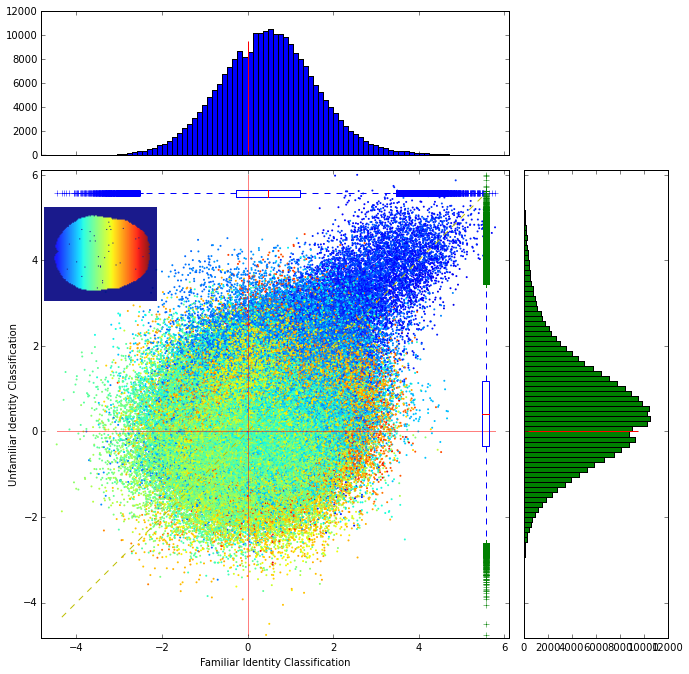

In [53]:
figs = plot_scatter_files([id_fam, id_unf], 
                          labels=['Familiar Identity Classification', 'Unfamiliar Identity Classification'],
                          include_stats=False,
                          rasterized=True)

In [55]:
savefig(figs, 'famid-unfid-all')

 total: 902629 union: 246355 masked: 12744 intersection: 241851 x_only: 2361 y_only: 2143


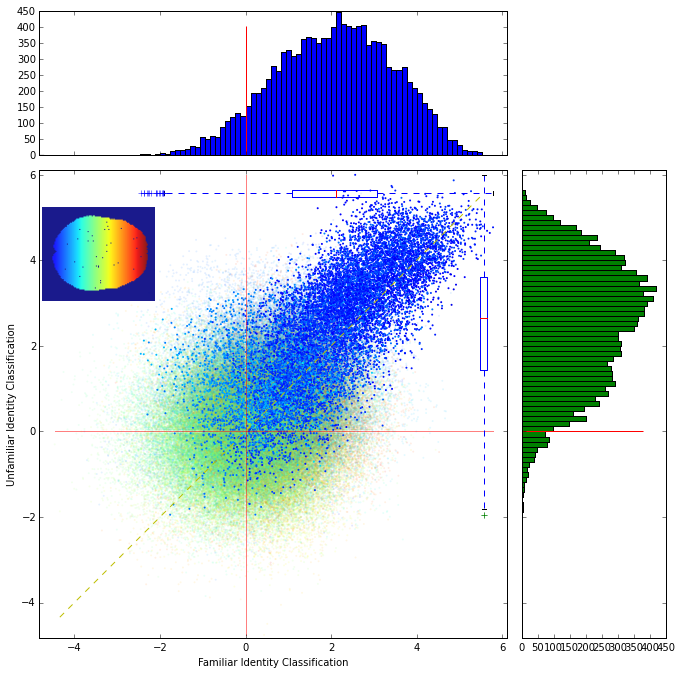

In [56]:
figs = plot_scatter_files([id_fam, id_unf], 
                          labels=['Familiar Identity Classification', 'Unfamiliar Identity Classification'],
                          mask_file=ev_mask,
                          masked_opacity=0.1,
                          include_stats=False,
                         rasterized=True)

In [57]:
savefig(figs, 'famid-unfid-evmask')

 total: 902629 union: 246355 masked: 4924 intersection: 241851 x_only: 2361 y_only: 2143


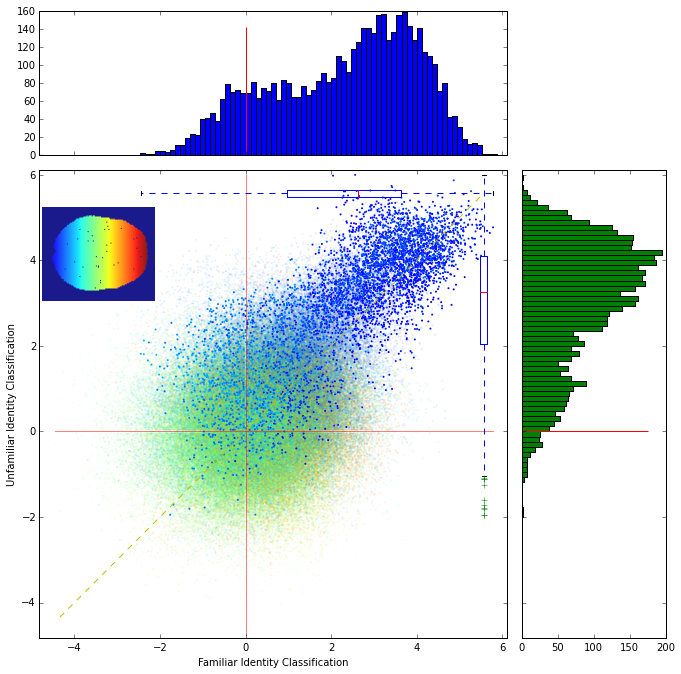

In [58]:
figs = plot_scatter_files([id_fam, id_unf], 
                          labels=['Familiar Identity Classification', 'Unfamiliar Identity Classification'],
                          mask_file=v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False,
                         rasterized=True)

In [59]:
savefig(figs, 'famid-unfid-v1vmask')

 total: 902629 union: 246355 masked: 1309 intersection: 241851 x_only: 2361 y_only: 2143


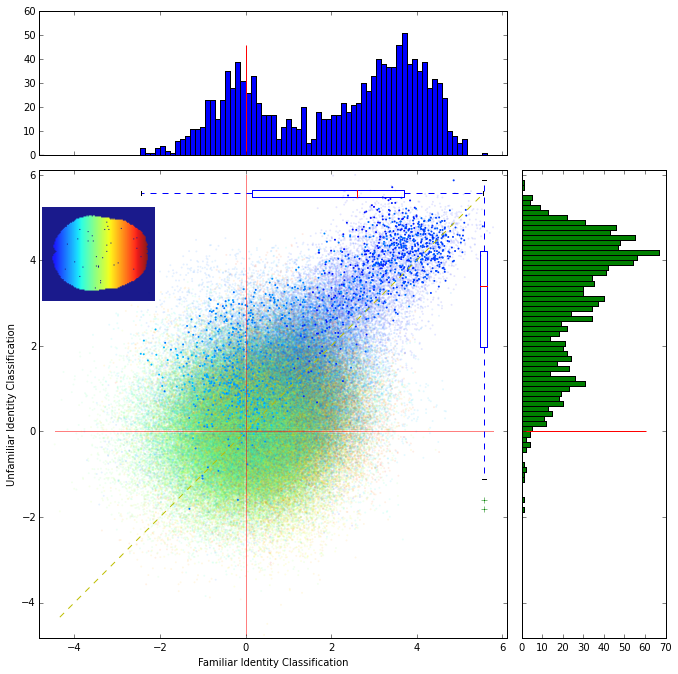

In [60]:
figs = plot_scatter_files([id_fam, id_unf], 
                          labels=['Familiar Identity Classification', 'Unfamiliar Identity Classification'],
                          mask_file=tfce_v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [61]:
savefig(figs, 'famid-unfid-tfce+v1vmask')

# 2. Familiarity Classification vs. Familiarity GLM

In [22]:
fam_glm = '/data/famface/openfmri/results/l2ants_final/model001/task001/subjects_all/stats/contrast_3/zstat1.nii.gz'
fam_mvpa = pjoin(mvpa_dir, 'familiar_vs_unfamiliar-id/ztest.nii.gz')

 total: 902629 union: 246509 intersection: 179774 x_only: 474 y_only: 66261


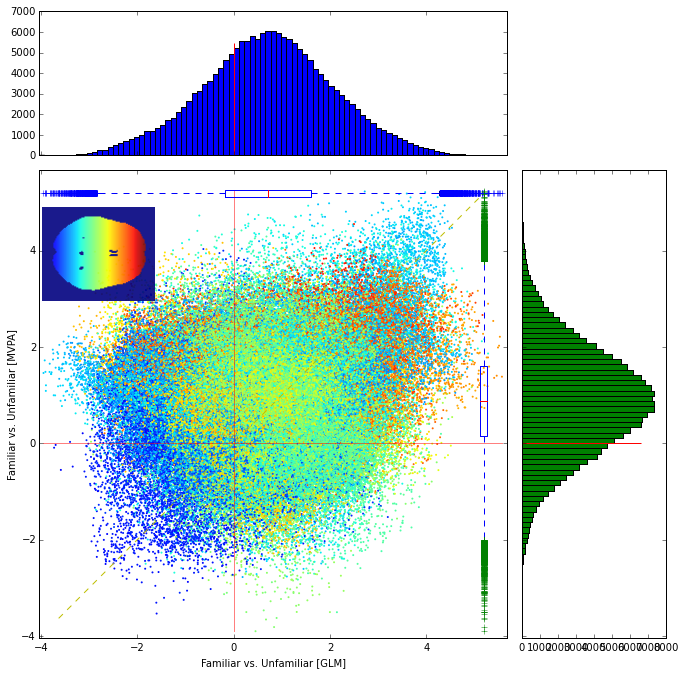

In [62]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          include_stats=False, rasterized=True)

In [63]:
savefig(figs, 'famglm-fammvpa-all')

 total: 902629 union: 246509 masked: 12088 intersection: 179774 x_only: 474 y_only: 66261


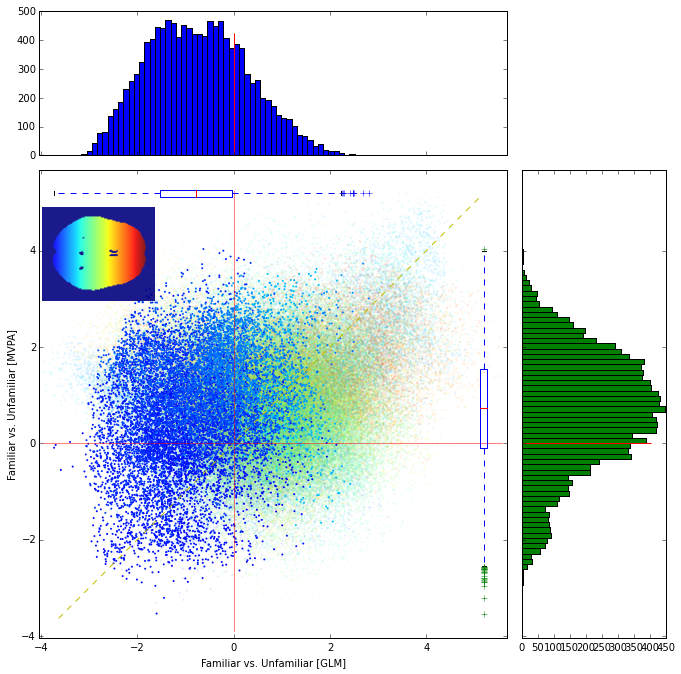

In [64]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          mask_file=ev_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [65]:
savefig(figs, 'famglm-fammvpa-evmask')

 total: 902629 union: 246509 masked: 4685 intersection: 179774 x_only: 474 y_only: 66261


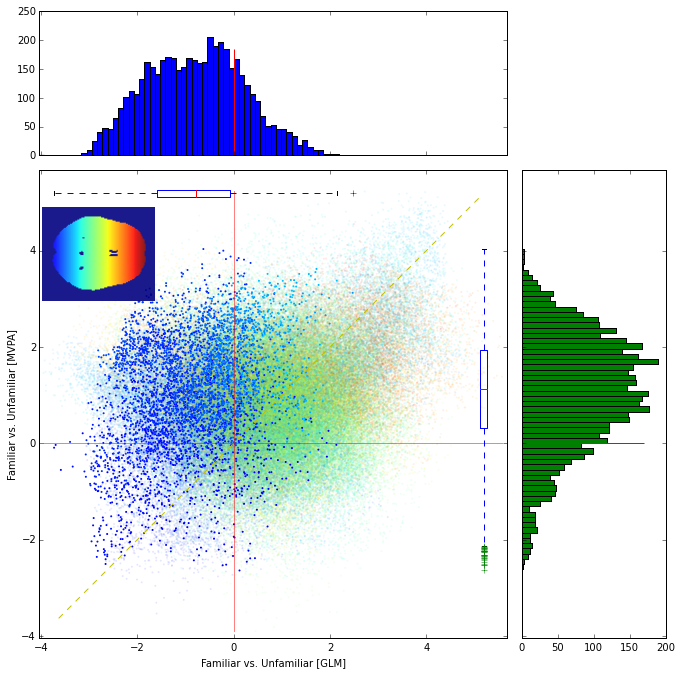

In [68]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          mask_file=v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [70]:
savefig(figs, 'famglm-fammvpa-v1vmask')

# 2b. Use cluster mask from GLM

In [75]:
glm_fam_mask = '/data/famface/openfmri/results/l2ants_final/'\
               'model001/task001/subjects_all/'\
               'stats/contrast_3/zstat1_normal+reversed_mask.nii.gz'

 total: 902629 union: 246509 masked: 20217 intersection: 179774 x_only: 474 y_only: 66261


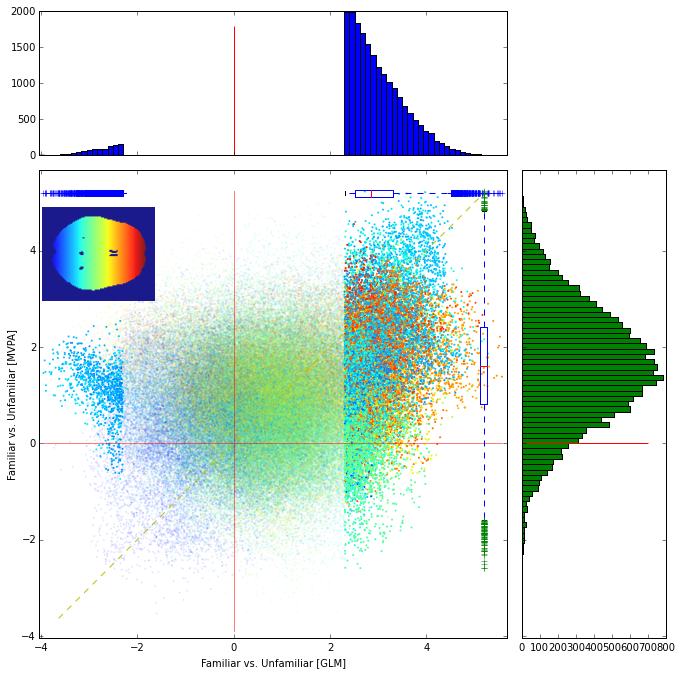

In [79]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          mask_file=glm_fam_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [80]:
savefig(figs, 'famglm-fammvpa-glmmask')

# 2c. Use cluster mask from TFCE

In [78]:
mvpa_fam_mask = '/data/famface/openfmri/results/l2ants_final/model001/task001/subjects_all/'\
                'stats/mvpa/slmskz5vx_svm/'\
                'familiar_vs_unfamiliar-id/sl_map_tfce_perms_b10000_binmask.nii.gz'

 total: 902629 union: 246509 masked: 31007 intersection: 179774 x_only: 474 y_only: 66261


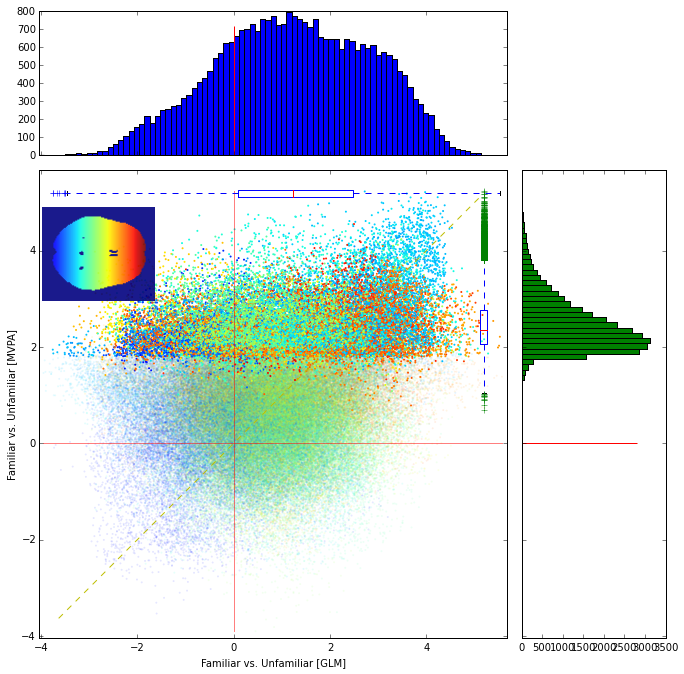

In [81]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          mask_file=mvpa_fam_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [82]:
savefig(figs, 'famglm-fammvpa-tfcemask')

# 2d. Intersection between V1v mask and TFCE mask (fam vs unfam-id)

 total: 902629 union: 246509 masked: 1311 intersection: 179774 x_only: 474 y_only: 66261


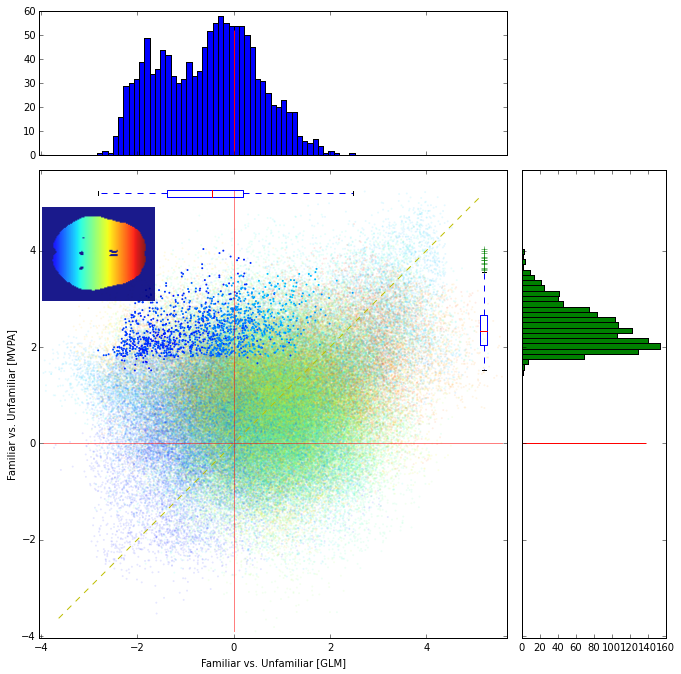

In [89]:
figs = plot_scatter_files([fam_glm, fam_mvpa], 
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar vs. Unfamiliar [MVPA]'],
                          mask_file=tfce_v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False,
                          rasterized=True)

In [90]:
savefig(figs, 'famglm-fammvpa-tfce+v1vmask')

# 3. [Fam - Unfam] Identity vs. Familiarity GLM

In [32]:
if False:
    import scipy.stats as stats
    def ztest(a, popmean, alternative):
        t, p = ttest_1samp(np.atleast_2d(a), popmean=popmean, alternative=alternative, axis=0)

        # convert to zvalues
        if alternative == 'two-sided':
            z = stats.norm.isf(p/2)
        else:
            z = stats.norm.isf(p)
        z = np.abs(z) * np.sign(t)

        return z

    cnt_id = []
    for isubj in range(1, 34):
        tmp = h5load(pjoin(fns.mvpadir(isubj),
                           'slmskz5vx_svm/identity-familiar/sl_map.hdf5')).samples
        tmp -= h5load(pjoin(fns.mvpadir(isubj),
                            'slmskz5vx_svm/identity-unfamiliar/sl_map.hdf5')).samples
        cnt_id.append(tmp)

    cnt_id = ztest(vstack(cnt_id), popmean=0., alternative='two-sided')

    cnt_id = Dataset(np.atleast_2d(cnt_id))

    fam_glm_ds = fmri_dataset(fam_glm, mask=fns.maskfn)

    cnt_id.sa = fam_glm_ds.sa
    cnt_id.fa = fam_glm_ds.fa
    cnt_id.a = fam_glm_ds.a

    map2nifti(cnt_id).to_filename('familiar-id_minus_unfamiliar-id_paired.nii.gz')

 total: 902629 union: 223419 intersection: 177897 x_only: 2351 y_only: 43171


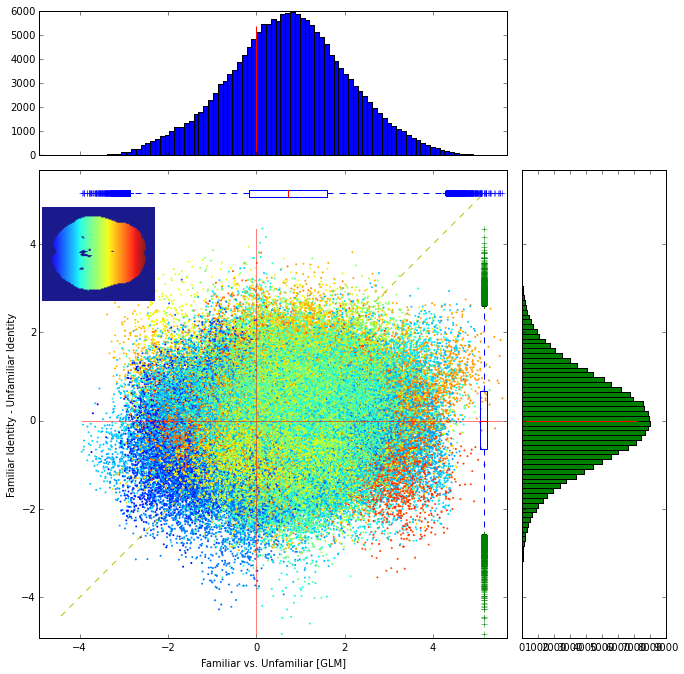

In [87]:
figs = plot_scatter_files([fam_glm, 'familiar-id_minus_unfamiliar-id_paired.nii.gz'],
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar Identity - Unfamiliar Identity'],
                          include_stats=False, rasterized=True)

In [88]:
savefig(figs, 'famglm-ctnid-all')

 total: 902629 union: 223419 masked: 11731 intersection: 177897 x_only: 2351 y_only: 43171


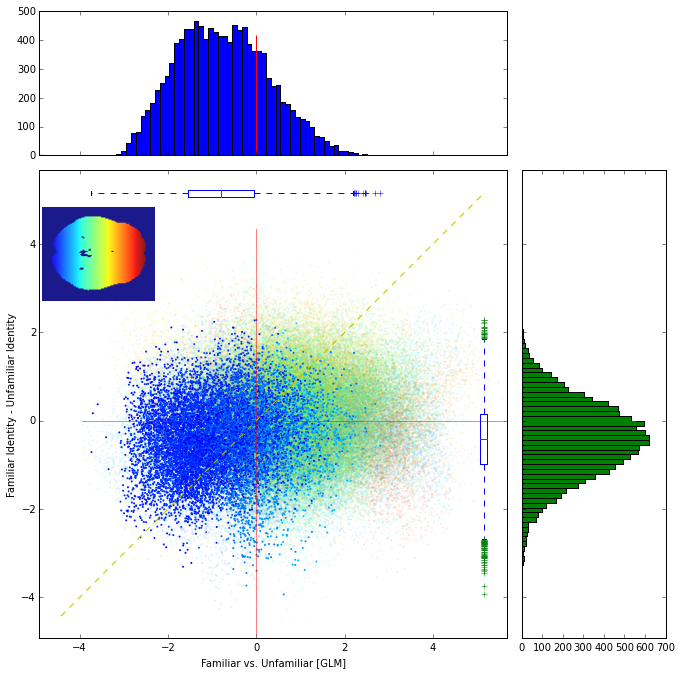

In [91]:
figs = plot_scatter_files([fam_glm, 'familiar-id_minus_unfamiliar-id_paired.nii.gz'],
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar Identity - Unfamiliar Identity'],
                          mask_file=ev_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [92]:
savefig(figs, 'famglm-ctnid-evmask')

 total: 902629 union: 223419 masked: 1309 intersection: 177897 x_only: 2351 y_only: 43171


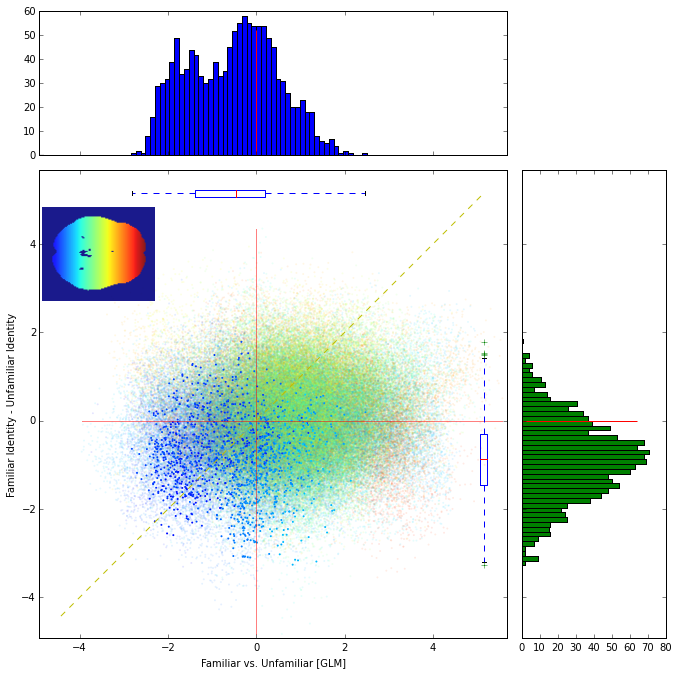

In [93]:
figs = plot_scatter_files([fam_glm, 'familiar-id_minus_unfamiliar-id_paired.nii.gz'],
                          labels=['Familiar vs. Unfamiliar [GLM]', 'Familiar Identity - Unfamiliar Identity'],
                          mask_file=tfce_v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False, rasterized=True)

In [94]:
savefig(figs, 'famglm-ctnid-tfce+v1vmask')

# 4. Familiarity across Identities vs. Familiarity across runs

In [95]:
fam_mvpa = pjoin(mvpa_dir, 'familiar_vs_unfamiliar-id/ztest.nii.gz')
fam_mvpa_runs = pjoin(mvpa_dir, 'familiar_vs_unfamiliar/ztest.nii.gz')

 total: 902629 union: 246322 intersection: 220158 x_only: 25877 y_only: 287


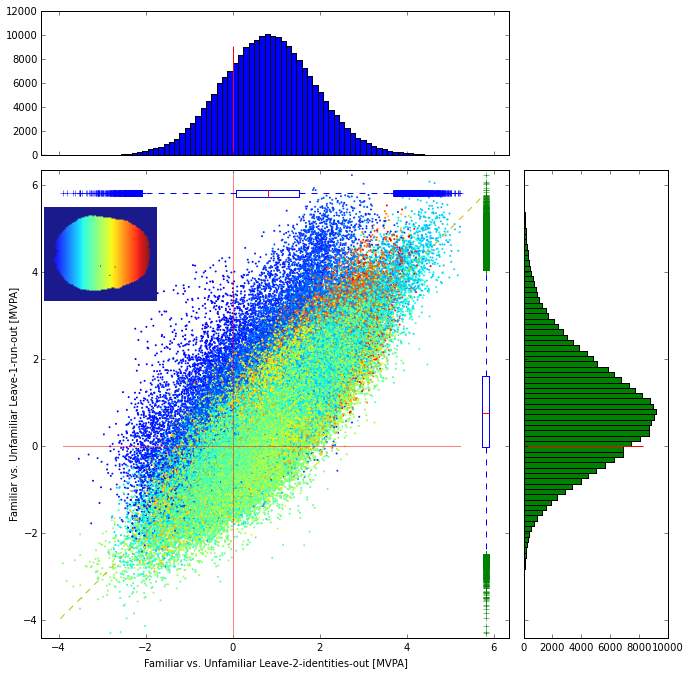

In [96]:
figs = plot_scatter_files([fam_mvpa, fam_mvpa_runs],
                          labels=['Familiar vs. Unfamiliar Leave-2-identities-out [MVPA]', 
                                  'Familiar vs. Unfamiliar Leave-1-run-out [MVPA]'],
                          #mask_file=ev_mask,
                          #masked_opacity=0.1,
                          include_stats=False,
                          rasterized=True)

In [97]:
savefig(figs, 'fammvpaid-fammvparun-all')

 total: 902629 union: 246322 masked: 11756 intersection: 220158 x_only: 25877 y_only: 287


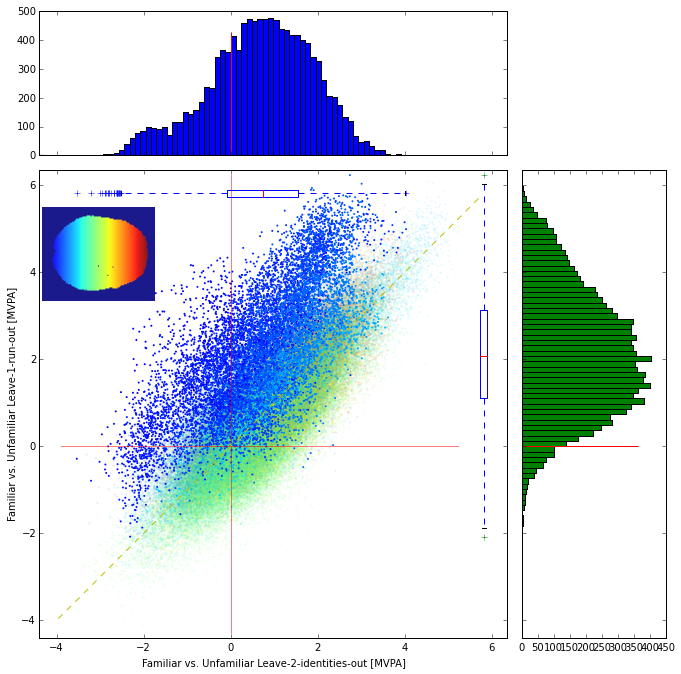

In [98]:
figs = plot_scatter_files([fam_mvpa, fam_mvpa_runs],
                          labels=['Familiar vs. Unfamiliar Leave-2-identities-out [MVPA]', 
                                  'Familiar vs. Unfamiliar Leave-1-run-out [MVPA]'],
                          mask_file=ev_mask,
                          masked_opacity=0.1,
                          include_stats=False,
                          rasterized=True)

In [99]:
savefig(figs, 'fammvpaid-fammvparun-evmask')

 total: 902629 union: 246322 masked: 1314 intersection: 220158 x_only: 25877 y_only: 287


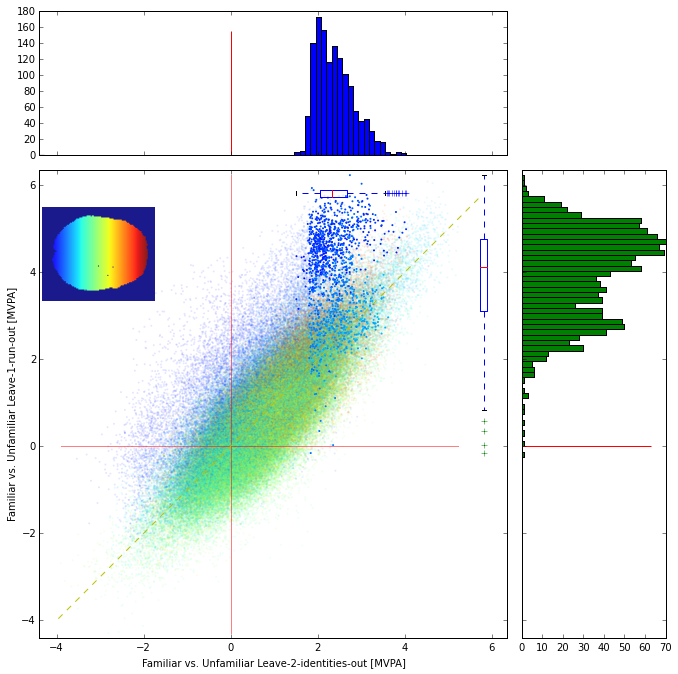

In [100]:
figs = plot_scatter_files([fam_mvpa, fam_mvpa_runs],
                          labels=['Familiar vs. Unfamiliar Leave-2-identities-out [MVPA]', 
                                  'Familiar vs. Unfamiliar Leave-1-run-out [MVPA]'],
                          mask_file=tfce_v1v_mask,
                          masked_opacity=0.1,
                          include_stats=False,
                          rasterized=True)

In [101]:
savefig(figs, 'fammvpaid-fammvparun-tfce+v1mask')